<a href="https://colab.research.google.com/github/Malika44/In-Class-Challenges/blob/main/Exploreing_MNL_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
student_performance = fetch_ucirepo(id=320)
X = student_performance.data.features
y = student_performance.data.targets
data = pd.concat([X, y], axis=1)
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


Step 1: Recode the Target Variable
Recode G3
 into 3 categories:

• Low (0–9), Medium (10–14), High (15–20)

In [14]:
def recode_g3(g):
    if g <= 9:
        return 'Low'
    elif g <= 14:
        return 'Medium'
    else:
        return 'High'

data['G3_cat'] = data['G3'].apply(recode_g3)
print(data['G3_cat'].value_counts())

G3_cat
Medium    418
High      131
Low       100
Name: count, dtype: int64


Task 1: Explore the Data

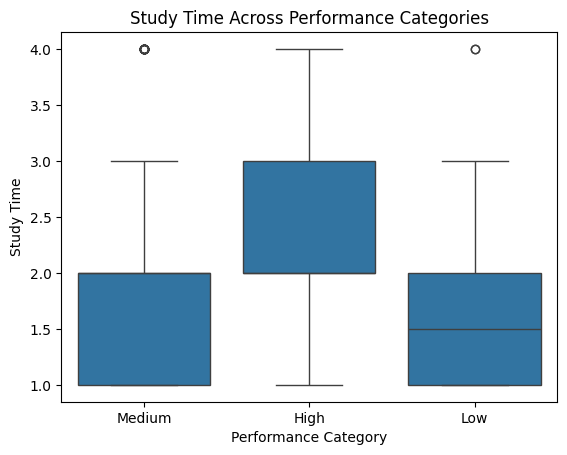

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='G3_cat', y='studytime', data=data)
plt.title("Study Time Across Performance Categories")
plt.xlabel("Performance Category")
plt.ylabel("Study Time")
plt.show()

Task 2: Fit the Multinomial Logistic Regression Model

In [17]:
data_model = data[['studytime', 'failures', 'absences', 'sex', 'G3_cat']]
data_model = pd.get_dummies(data_model, columns=['sex'], drop_first=True)
from sklearn.model_selection import train_test_split
X = data_model.drop(columns=['G3_cat'])
y = data_model['G3_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
print("Baseline class: Low ")


Baseline class: Low 


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


 Task 3: Interpret One Coefficient

In [18]:
import numpy as np
coeff_df = pd.DataFrame(model.coef_, columns=X.columns, index=model.classes_)
print(coeff_df.loc['High', 'studytime'])

0.4106495986491082


For each one-unit increase in study time, the log-odds of a student being in the High performance category (compared to the baseline category Low) increases by approximately 0.41, holding all other variables constant.

In simpler terms, more study time is associated with a higher likelihood of achieving high final grades relative to low performance.

**Task 4: Evaluate Model Accuracy**

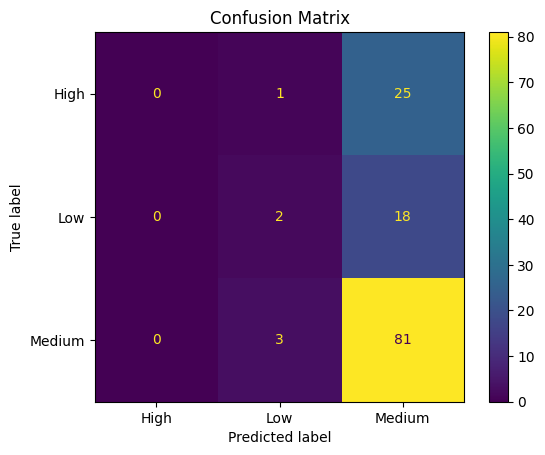

Overall Accuracy: 0.64


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
acc = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {acc:.2f}")
